In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn import preprocessing
from sklearn.feature_extraction import FeatureHasher
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
#uploading dataset

df = pd.read_csv('/content/drive/MyDrive/encoded_dataset.csv')
df.head()

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,Whitelist,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,Whitelist,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,Whitelist,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,Whitelist,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,Whitelist,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884


In [3]:
labelencoder = LabelEncoder()

df['list'] = labelencoder.fit_transform(df['list'])
df

,list,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,1,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,1,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,1,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,1,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,1,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201544,0,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
201545,0,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
201546,0,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
201547,0,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [4]:
X = df.drop(labels = ['list'], axis = 1)
y = df['list']
X.shape, y.shape

((201549, 19), (201549,))

In [5]:
X

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,211456,2.231824,447,496,628,654,695,206,702,303,687,51,315,866,950,96,152,509,645
1,17584,6.143784,414,499,642,539,412,283,62,307,459,45,304,257,651,565,34,34,750
2,47104,5.694129,952,576,12,713,264,373,228,253,825,866,373,93,862,513,770,14,812
3,242816,3.918845,932,309,403,542,335,602,437,270,162,656,959,55,84,854,575,433,431
4,119240,6.168794,264,876,545,379,985,773,876,61,781,919,922,164,594,138,842,484,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201544,764928,7.885477,932,674,559,340,325,708,748,15,932,246,273,579,457,407,270,335,971
201545,710144,7.952831,118,19,422,795,350,389,903,62,62,742,979,836,647,397,706,873,70
201546,637200,6.883626,936,277,370,640,39,112,401,890,522,79,607,880,231,693,367,729,260
201547,1013904,6.677207,828,241,714,823,365,905,614,1003,98,602,1,897,956,265,73,851,824


In [6]:
feature_names = np.array(X.columns)
feature_names

array(['length', 'entropy', 'md5_int1', 'md5_int2', 'md5_int3',
       'md5_int4', 'sha1_int1', 'sha1_int2', 'sha1_int3', 'sha1_int4',
       'sha1_int5', 'sha256_int1', 'sha256_int2', 'sha256_int3',
       'sha256_int4', 'sha256_int5', 'sha256_int6', 'sha256_int7',
       'sha256_int8'], dtype=object)

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.24805188, -3.71572179, -0.19350558, ..., -1.20902918,
         0.01549038,  0.48392332],
       [-0.3639352 , -0.22734377, -0.30682631, ..., -1.61416032,
        -1.61357609,  0.84466922],
       [-0.34629017, -0.62831071,  1.54064506, ...,  0.91275937,
        -1.68216837,  1.05768108],
       ...,
       [ 0.00642853,  0.43238909,  1.48570168, ..., -0.4708665 ,
         0.77000537, -0.83881165],
       [ 0.2315962 ,  0.24832087,  1.11483382, ..., -1.48026105,
         1.18841823,  1.09890919],
       [ 1.2624868 ,  1.11743792, -0.56437344, ...,  1.34879035,
         0.59852469,  0.21937632]])

In [8]:
df1 = pd.DataFrame(X, columns = feature_names)
df1

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
0,-0.248052,-3.715722,-0.193506,-0.027023,0.424563,0.519952,0.656080,-1.020388,0.678161,-0.690056,0.626842,-1.557271,-0.646833,1.237059,1.529620,-1.402386,-1.209029,0.015490,0.483923
1,-0.363935,-0.227344,-0.306826,-0.016738,0.472572,0.124438,-0.316890,-0.756135,-1.516400,-0.676324,-0.156109,-1.577879,-0.684608,-0.852941,0.502791,0.207174,-1.614160,-1.613576,0.844669
2,-0.346290,-0.628311,1.540645,0.247256,-1.687855,0.722867,-0.825722,-0.447268,-0.947186,-0.861708,1.100732,1.242043,-0.447654,-1.415766,1.227410,0.028715,0.912759,-1.682168,1.057681
3,-0.229307,-2.211369,1.471966,-0.668150,-0.347019,0.134756,-0.581620,0.338625,-0.230524,-0.803346,-1.176004,0.520748,1.564739,-1.546176,-1.444408,1.198992,0.243263,-0.245160,-0.251311
4,-0.303172,-0.205042,-0.821921,1.275802,0.139935,-0.425841,1.653116,0.925472,1.274808,-1.520851,0.949637,1.424085,1.437676,-1.172104,0.307041,-1.258246,1.159958,-0.070250,1.305050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201544,0.082776,1.325761,1.471966,0.583248,0.187944,-0.559972,-0.616001,0.702402,0.835896,-1.678771,1.468169,-0.887496,-0.791066,0.252116,-0.163447,-0.335066,-0.803898,-0.581262,1.603953
201545,0.050029,1.385822,-1.323279,-1.662412,-0.281863,1.004885,-0.530049,-0.392359,1.367391,-1.517418,-1.519403,0.816135,1.633421,1.134103,0.489054,-0.369385,0.693027,1.263870,-1.491590
201546,0.006429,0.432389,1.485702,-0.777862,-0.460184,0.471802,-1.599284,-1.342982,-0.353968,1.325136,0.060233,-1.461098,0.355929,1.285105,-0.939579,0.646457,-0.470866,0.770005,-0.838812
201547,0.231596,0.248321,1.114834,-0.901287,0.719478,1.101184,-0.478478,1.378476,0.376409,1.713070,-1.395779,0.335272,-1.725145,1.343447,1.550225,-0.822395,-1.480261,1.188418,1.098909


In [9]:
cor = df1.corr()
cor

,length,entropy,md5_int1,md5_int2,md5_int3,md5_int4,sha1_int1,sha1_int2,sha1_int3,sha1_int4,sha1_int5,sha256_int1,sha256_int2,sha256_int3,sha256_int4,sha256_int5,sha256_int6,sha256_int7,sha256_int8
length,1.000000,0.124923,-0.000609,0.000353,-0.001750,-0.001461,0.000736,-0.004908,-0.000099,0.001549,-0.000773,0.001881,0.002803,-0.000442,-0.004927,-0.003290,0.001839,-0.001435,0.001269
entropy,0.124923,1.000000,0.002017,-0.001316,-0.005886,0.003120,0.001673,-0.001183,-0.001629,0.001910,-0.001412,0.000926,0.002900,0.001274,-0.000961,-0.000181,0.002211,-0.000405,0.005143
md5_int1,-0.000609,0.002017,1.000000,0.001481,-0.001107,0.000481,0.000351,0.002767,0.000881,-0.001645,-0.000490,0.001216,0.000688,-0.006689,0.001879,0.000968,0.001282,0.003803,-0.001504
md5_int2,0.000353,-0.001316,0.001481,1.000000,0.001662,0.001463,0.003440,0.001062,0.002433,-0.000892,-0.000252,0.001976,0.001601,-0.000842,0.000500,0.002731,0.001728,0.000868,0.000485
md5_int3,-0.001750,-0.005886,-0.001107,0.001662,1.000000,0.002813,0.002249,0.001974,0.003667,0.001223,0.001263,0.000292,-0.000719,0.000956,-0.006088,-0.000443,0.000454,0.000287,-0.001572
md5_int4,-0.001461,0.003120,0.000481,0.001463,0.002813,1.000000,-0.001069,-0.003549,-0.002154,-0.001515,0.000139,0.001063,-0.001838,0.001703,0.003506,0.004058,0.001202,-0.001632,-0.001665
sha1_int1,0.000736,0.001673,0.000351,0.003440,0.002249,-0.001069,1.000000,-0.000642,0.001740,-0.000185,-0.001465,0.003471,-0.002145,-0.000568,0.000204,-0.002263,-0.001437,-0.000978,0.002357
sha1_int2,-0.004908,-0.001183,0.002767,0.001062,0.001974,-0.003549,-0.000642,1.000000,0.000876,0.000073,-0.000721,-0.003276,-0.001739,0.000231,0.003976,0.002586,-0.001053,0.001134,-0.000798
sha1_int3,-0.000099,-0.001629,0.000881,0.002433,0.003667,-0.002154,0.001740,0.000876,1.000000,0.001158,0.002659,-0.002469,0.002548,0.002059,0.000448,0.001902,-0.002831,-0.002817,0.004266
sha1_int4,0.001549,0.001910,-0.001645,-0.000892,0.001223,-0.001515,-0.000185,0.000073,0.001158,1.000000,0.001614,0.003023,-0.001108,-0.001834,-0.003192,-0.001719,0.000838,-0.007186,-0.000082


<Axes: >

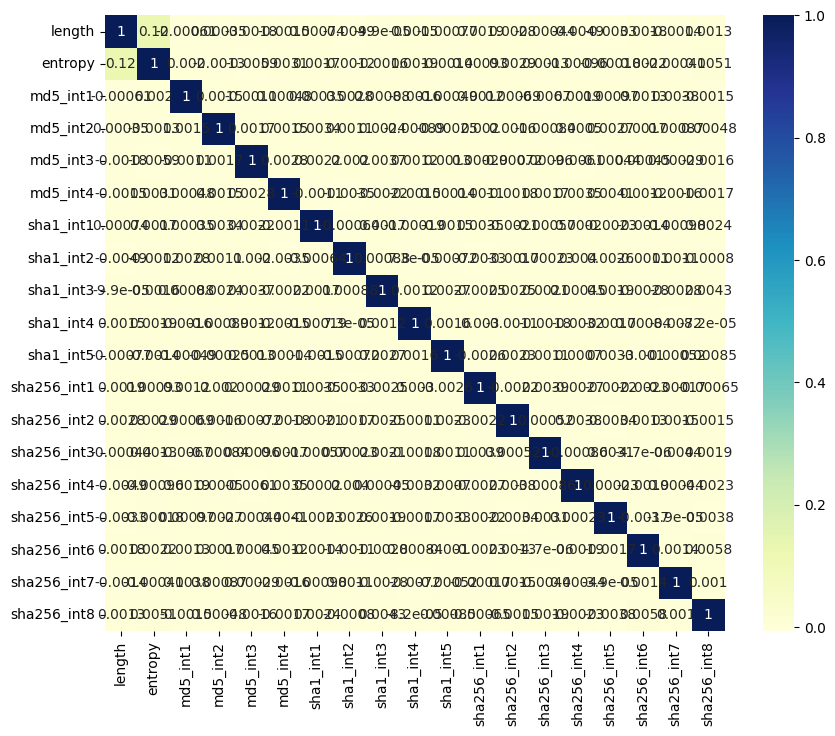

In [10]:
#generation of heat map for the given data

plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

In [11]:
#splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(151161, 19)
(151161,)
(50388, 19)
(50388,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, cohen_kappa_score)
from sklearn.model_selection import cross_val_score

In [13]:
#declaring all the models to be used

models = []

models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['AdaBoostClassifier', AdaBoostClassifier(random_state=0)])
models.append(['ExtraTrees', ExtraTreesClassifier(random_state=0)])
models.append(['XGBClassifier', XGBClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(random_state=0)])

In [14]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

In [15]:
def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]

      start_time = time.time()  # Start timing

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)

      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      end_time = time.time()  # End timing
      execution_time = end_time - start_time

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('')
      print('Execution Time: {:.2f} seconds'.format(execution_time))  # Print execution time
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_2.append(execution_time)  # Add execution time to the list
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std.Deviation', 'ROC_AUC',
                                    'Precision', 'Recall', 'F1 Score', 'Cohen-Kappa Score', 'Execution Time'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy', 'Execution Time'],inplace=True,ascending=False)

  return df1

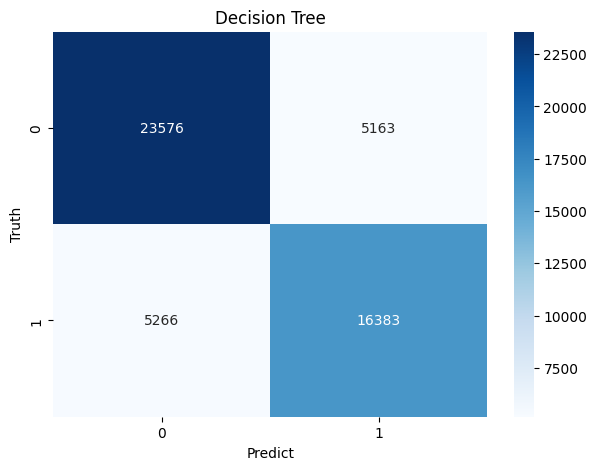

Decision Tree :
[[23576  5163]
 [ 5266 16383]]
Accuracy Score:  0.7930261173295229

K-Fold Validation Mean Accuracy: 78.83 %

Standard Deviation: 0.22 %

ROC AUC Score: 0.79 %

Precision: 0.76 %

Recall: 0.76 %

F1 Score: 0.76 %

Cohen Score: 0.58 %

Execution Time: 49.26 seconds
----------------------------------------



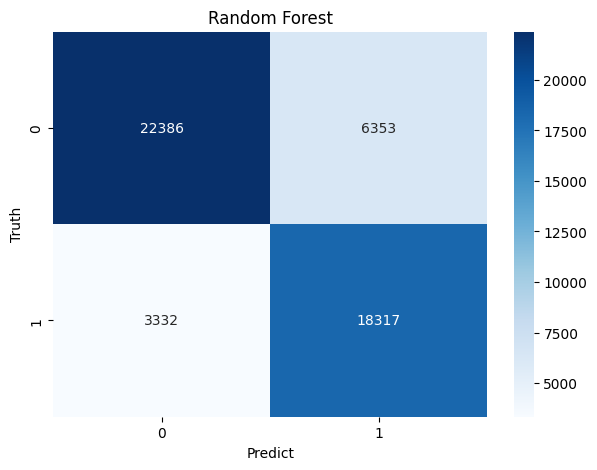

Random Forest :
[[22386  6353]
 [ 3332 18317]]
Accuracy Score:  0.8077915376676986

K-Fold Validation Mean Accuracy: 80.70 %

Standard Deviation: 0.14 %

ROC AUC Score: 0.81 %

Precision: 0.74 %

Recall: 0.85 %

F1 Score: 0.79 %

Cohen Score: 0.61 %

Execution Time: 581.14 seconds
----------------------------------------



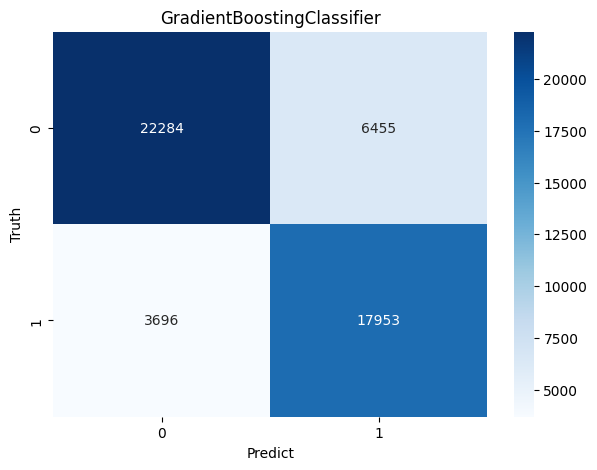

GradientBoostingClassifier :
[[22284  6455]
 [ 3696 17953]]
Accuracy Score:  0.7985433039612606

K-Fold Validation Mean Accuracy: 80.08 %

Standard Deviation: 0.28 %

ROC AUC Score: 0.80 %

Precision: 0.74 %

Recall: 0.83 %

F1 Score: 0.78 %

Cohen Score: 0.60 %

Execution Time: 498.97 seconds
----------------------------------------



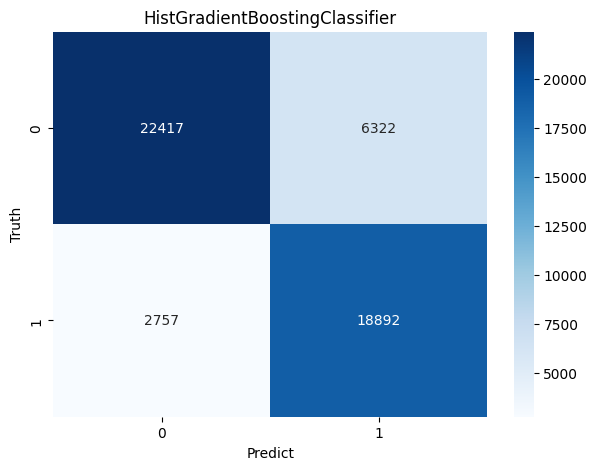

HistGradientBoostingClassifier :
[[22417  6322]
 [ 2757 18892]]
Accuracy Score:  0.8198182106850838

K-Fold Validation Mean Accuracy: 81.97 %

Standard Deviation: 0.25 %

ROC AUC Score: 0.83 %

Precision: 0.75 %

Recall: 0.87 %

F1 Score: 0.81 %

Cohen Score: 0.64 %

Execution Time: 23.77 seconds
----------------------------------------



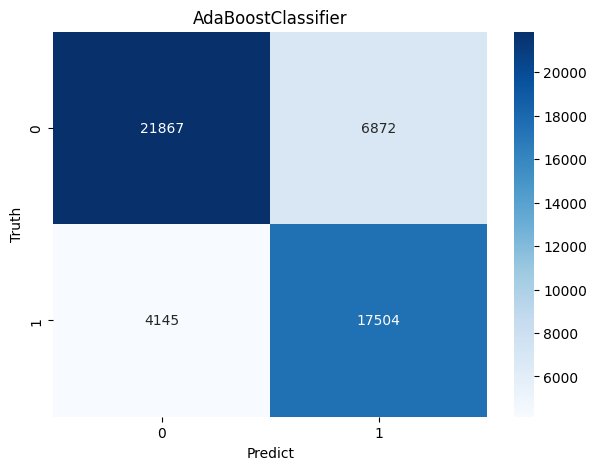

AdaBoostClassifier :
[[21867  6872]
 [ 4145 17504]]
Accuracy Score:  0.7813566722235453

K-Fold Validation Mean Accuracy: 78.35 %

Standard Deviation: 0.41 %

ROC AUC Score: 0.78 %

Precision: 0.72 %

Recall: 0.81 %

F1 Score: 0.76 %

Cohen Score: 0.56 %

Execution Time: 98.65 seconds
----------------------------------------



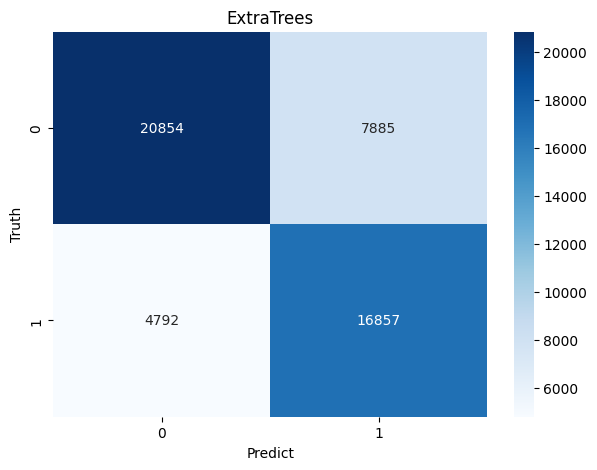

ExtraTrees :
[[20854  7885]
 [ 4792 16857]]
Accuracy Score:  0.7484123203937445

K-Fold Validation Mean Accuracy: 74.97 %

Standard Deviation: 0.19 %

ROC AUC Score: 0.75 %

Precision: 0.68 %

Recall: 0.78 %

F1 Score: 0.73 %

Cohen Score: 0.50 %

Execution Time: 203.29 seconds
----------------------------------------



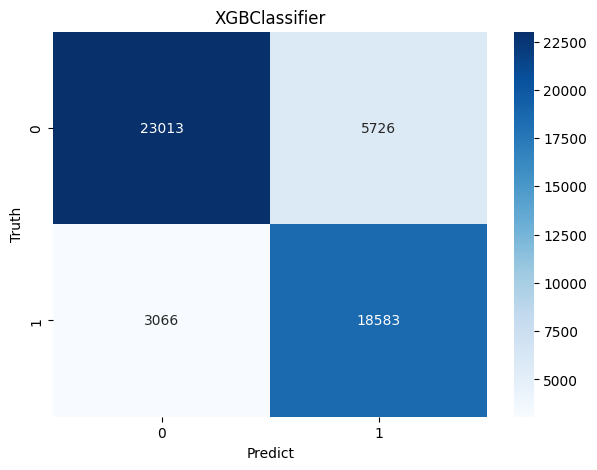

XGBClassifier :
[[23013  5726]
 [ 3066 18583]]
Accuracy Score:  0.8255140112725252

K-Fold Validation Mean Accuracy: 82.21 %

Standard Deviation: 0.26 %

ROC AUC Score: 0.83 %

Precision: 0.76 %

Recall: 0.86 %

F1 Score: 0.81 %

Cohen Score: 0.65 %

Execution Time: 19.11 seconds
----------------------------------------

[LightGBM] [Info] Number of positive: 65163, number of negative: 85998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 151161, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431083 -> initscore=-0.277432
[LightGBM] [Info] Start training from score -0.277432


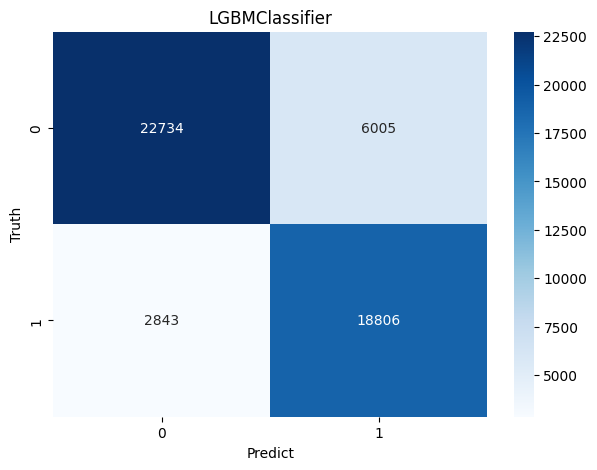

[LightGBM] [Info] Number of positive: 52130, number of negative: 68798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 120928, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431083 -> initscore=-0.277434
[LightGBM] [Info] Start training from score -0.277434
[LightGBM] [Info] Number of positive: 52130, number of negative: 68799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 120929, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431079 -> initscore=-0.277449
[LightGBM] [Info] Start training from score -0.277449
[LightGBM]

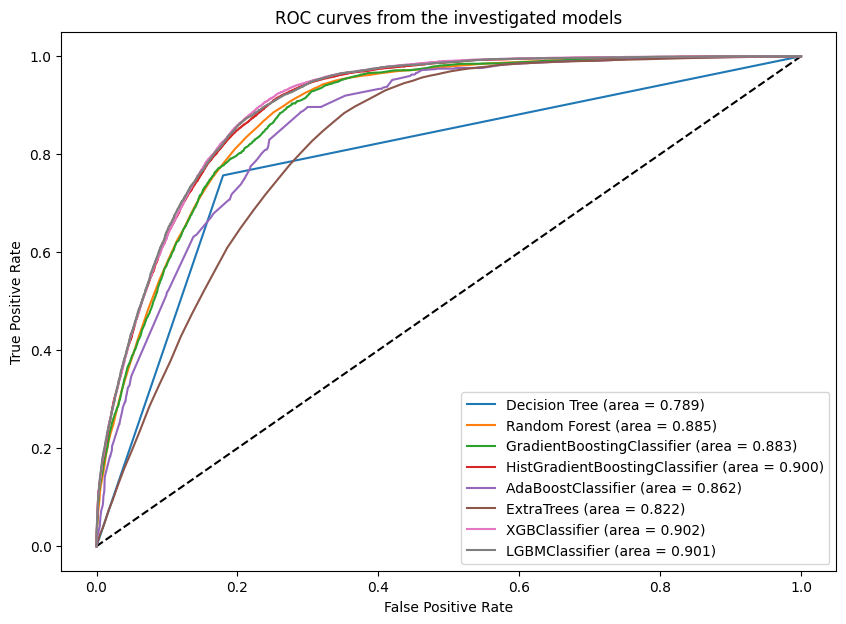

In [16]:
#generating confusion matrices and results of performance metrices of the models used

test_results = run_model(X_train, y_train, X_test, y_test, models, 5)

In [17]:
test_results

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score,Execution Time
6,XGBClassifier,82.551401,82.209695,0.263234,0.829568,0.764449,0.858377,0.808695,0.649295,19.109349
7,LGBMClassifier,82.440264,82.164048,0.306840,0.829864,0.757970,0.868678,0.809557,0.648052,17.833230
3,HistGradientBoostingClassifier,81.981821,81.970877,0.245787,0.826335,0.749266,0.872650,0.806265,0.639677,23.768388
1,Random Forest,80.779154,80.698063,0.138868,0.812516,0.742481,0.846090,0.790907,0.614455,581.140664
2,GradientBoostingClassifier,79.854330,80.084147,0.283943,0.802334,0.735538,0.829276,0.779599,0.595310,498.965620
0,Decision Tree,79.302612,78.831178,0.222043,0.788552,0.760373,0.756756,0.758560,0.577443,49.264634
4,AdaBoostClassifier,78.135667,78.348246,0.411890,0.784709,0.718083,0.808536,0.760630,0.560706,98.650581
5,ExtraTrees,74.841232,74.965102,0.191304,0.752142,0.681311,0.778650,0.726736,0.495551,203.288857
